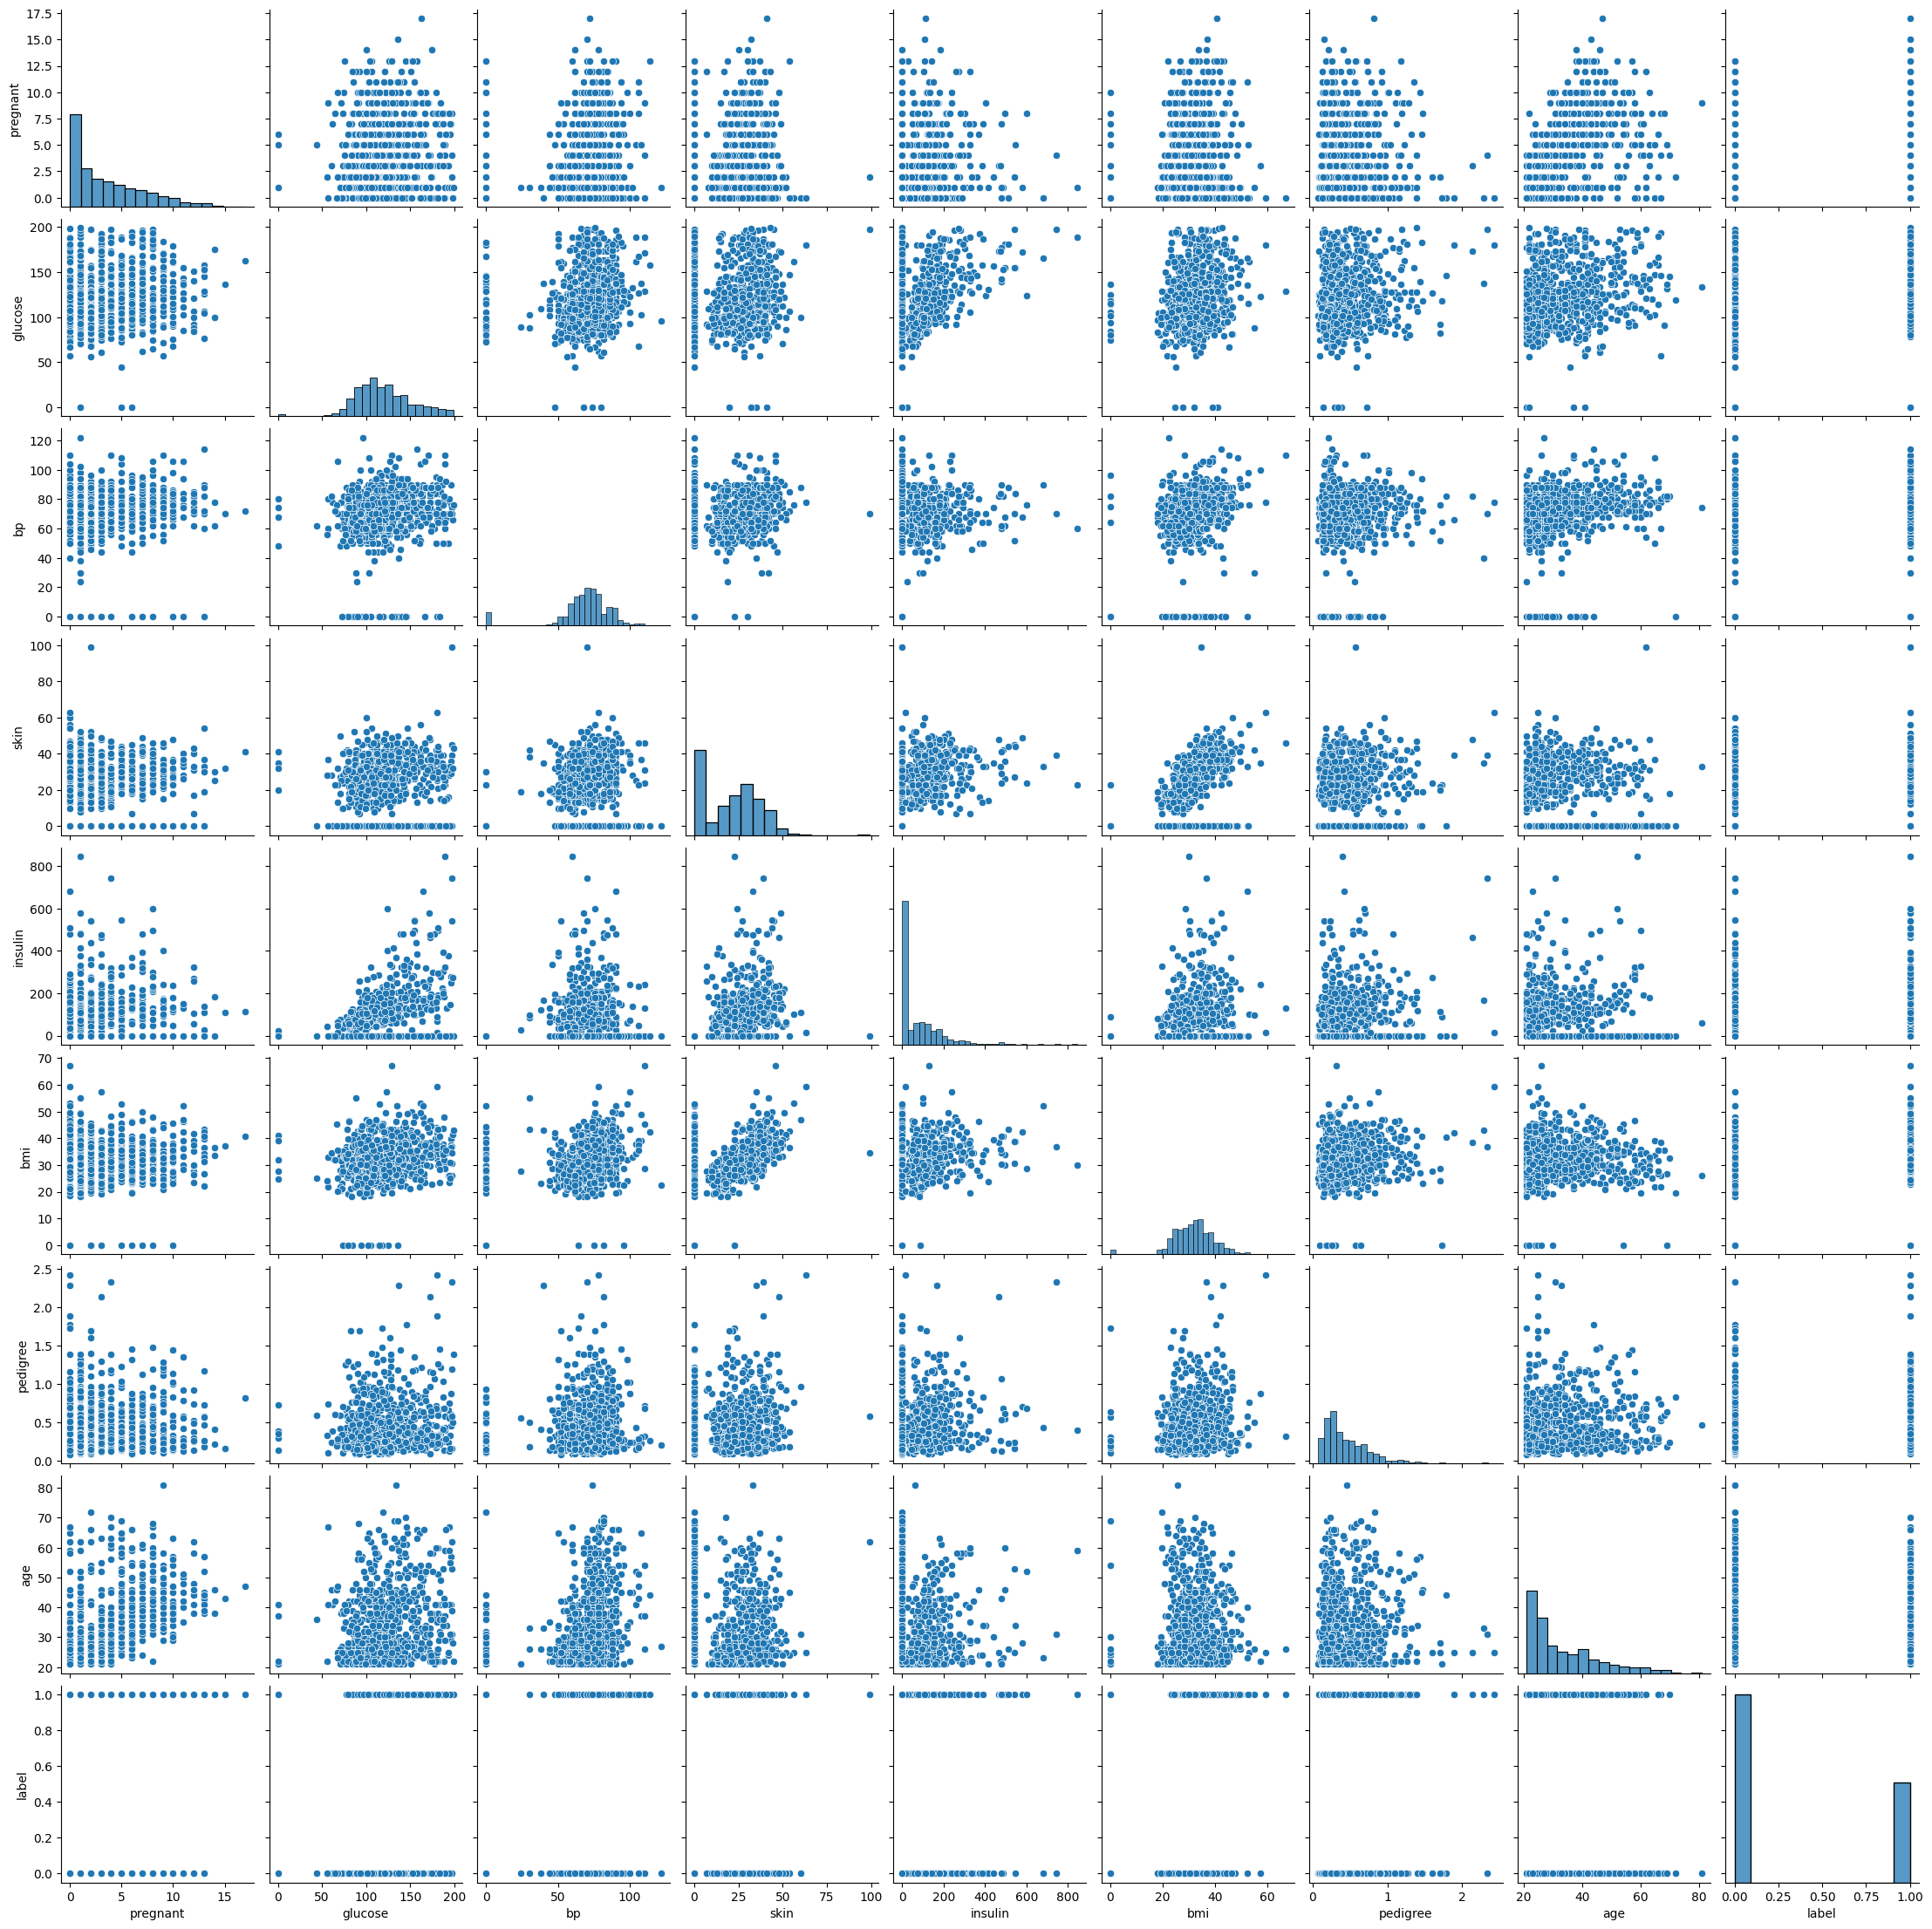

In [ ]:
# Import libraries
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns

# Load dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=1, names=col_names)

# Split dataset into features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'skin']
X = pima[feature_cols]
y = pima.label

sns.pairplot(pima) # This line takes a while to run

In [ ]:
# See existing data types
print(type(X))
print(type(y))

# Convert to PyTorch data types
X = torch.tensor(X.to_numpy(), dtype=torch.float32)
y = torch.tensor(y.to_numpy(), dtype=torch.float32).reshape(-1, 1)

# See new data types
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16) # Set random_state for reproducibility

In [ ]:
model = nn.Sequential(
    nn.Linear(8, 12), # 8 input nodes to 12 nodes in the first hidden layer
    nn.ReLU(),        # ReLU activation for first hidden layer
    nn.Linear(12, 8), # 12 nodes from first hidden layer to 8 in the second
    nn.ReLU(),        # ReLU activation for second hidden layer
    nn.Linear(8, 1),  # 8 nodes from second hidden layer to 1 output node
    nn.Sigmoid()      # Sigmoid activation for output layer
)

print(model) # Check the model

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


In [ ]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
n_epochs = 100
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 1.0508573055267334
Finished epoch 1, latest loss 0.7939695715904236
Finished epoch 2, latest loss 0.7032855749130249
Finished epoch 3, latest loss 0.680842936038971
Finished epoch 4, latest loss 0.6677244305610657
Finished epoch 5, latest loss 0.6591982841491699
Finished epoch 6, latest loss 0.6414254903793335
Finished epoch 7, latest loss 0.6264680027961731
Finished epoch 8, latest loss 0.6190128922462463
Finished epoch 9, latest loss 0.6096200942993164
Finished epoch 10, latest loss 0.607365071773529
Finished epoch 11, latest loss 0.5987145304679871
Finished epoch 12, latest loss 0.5953987836837769
Finished epoch 13, latest loss 0.589282214641571
Finished epoch 14, latest loss 0.5838949084281921
Finished epoch 15, latest loss 0.5807499289512634
Finished epoch 16, latest loss 0.5819346308708191
Finished epoch 17, latest loss 0.5784292221069336
Finished epoch 18, latest loss 0.600538432598114
Finished epoch 19, latest loss 0.5861531496047974
Finished epoch

In [ ]:
with torch.no_grad(): # This prevents the model from calculating gradients when we don't need it to (optional)
  y_pred = model(X_test)

print(y_pred)

tensor([[0.5220],
        [0.8736],
        [0.1836],
        [0.2568],
        [0.7538],
        [0.0815],
        [0.8648],
        [0.7016],
        [0.0865],
        [0.0649],
        [0.1426],
        [0.5292],
        [0.7003],
        [0.4639],
        [0.8203],
        [0.5054],
        [0.3538],
        [0.4297],
        [0.0824],
        [0.2010],
        [0.3168],
        [0.1504],
        [0.6460],
        [0.0488],
        [0.5410],
        [0.1519],
        [0.1214],
        [0.1653],
        [0.1263],
        [0.2085],
        [0.4226],
        [0.3182],
        [0.2052],
        [0.1344],
        [0.6434],
        [0.7530],
        [0.4824],
        [0.7671],
        [0.1815],
        [0.1906],
        [0.0379],
        [0.0896],
        [0.2884],
        [0.1752],
        [0.0948],
        [0.0741],
        [0.7103],
        [0.1331],
        [0.3331],
        [0.1585],
        [0.2397],
        [0.1727],
        [0.2326],
        [0.0341],
        [0.1554],
        [0

Our model outputs probabilities between 0 and 1. We can convert these probabilities to binary predictions by rounding them.

In [ ]:
y_pred = y_pred.round()

Text(0.5, 427.9555555555555, 'Predicted label')

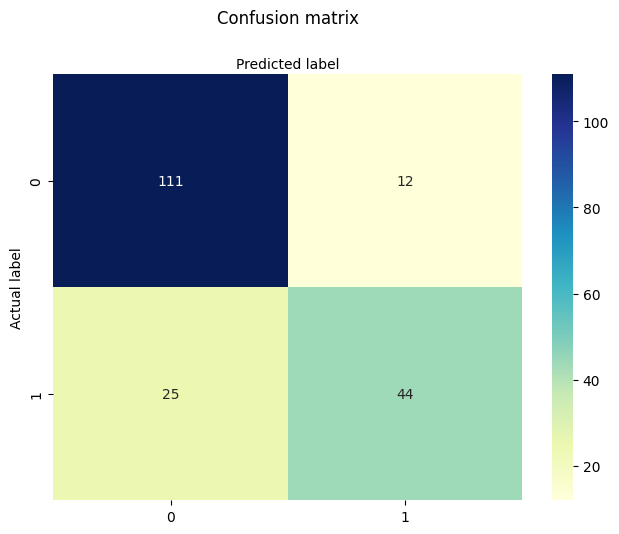

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # Names of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')